# Gradient descent

- iterative optimization algorithm for finding the minimum of a function
- the algorithm computes the slope (gradient) that is first order derivative of the function at the current point
- move in the opposite direction of the slope increase from the current point by the computed amount


## Types of Gradient Descent Algorithms

- batch gradient descent
- stochastic gradient descent
- mini-batch gradient descent

## Batch Gradient Descent

Similar to stochastic gradient descent. But instead of updating the paramaters of the network after computing the loss of every training sample in the training set, the parameters are updated once that is after all the training examples have been passed through the network. 

Pros:
- less oscillations and noisy steps taken towards the global minima of the loss function due to updating the parameters by computing the average of all the training samples rather than the values of a single step
- it can benefit from the vectorization which increases the speed of processing all training samples together
- it produces a more stable gradient descent convergence and stable error gradient that stochastic gradient descent
- computationally more efficient as all the resources are not being used to process a single sampe rather are being used for all training samples

Cons:
- can lead to local minima and unlike stochastic gradient descent, no noisy steps are there to help get out of the local minima
- the entire training set can be too large to process in the memory due to which additional memory might be needed
- may take longer for processing all the samples as batch



Code example:
```python
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size # Number of training examples.
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat - y)
    return theta
```

## Stochastic Gradient Descent

Pros:
- it is easier to fit into memory due to a single training being processed by the network
- computationally fast as only one sample is processed at a time
- converges faster for larger dataset as it causes updates to the paramater more frequently

Cons:
- can be noisy due to frequent updates, and also lead the gradient descent into other directions
- may take longer to achieve convergence to the minima of the loss function
- loses the advantage of vectorized operations as it deals with only a single example at a time


Code example:

```python
def SGD(cost_fn, theta0, alpha, num_iters):
    """
    Arguments:
    cost_fn -- the function to optimize, takes a single argument and yields the cost and gradient
    theta0 -- the initial point to start SGD from
    num_iters -- total iteration to run SGD
    Return:
    theta -- the parameter value after SGD finishes
    """
    start_iter = 0
    theta = theta0
    for _ in range(start_iter + 1, num_iters + 1):
        _, gradient = cost_fn(theta)
        theta = theta - (alpha * gradient) # There is NO dot product.
    return theta
```

## Mini Batch Gradient Descent: A compromise

This is a mixture of both stochastic and batch gradient descent. The training set is divided into multiple groups called batches. Each batch has a number of training samples in it.

At a time a single batch is passed through the network which computes the loss of every sample in the batch and uses their average to update the parameters of the neural network. 

For example, say the training set has 100 training examples which is divided into 5 batches with each batch containing 20 training examples. This means that the equation will be iterated over 5 times (the number of batches).

Pros:
- Easily fits into memory
- computationally efficient
- benefit from vectorization
- if it stucks in local minimum, some noisy steps can lead the way out of them
- average of the training samples produces stable error gradients and convergence.

In [1]:
def sum_of_squares(v):
    """Computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

In [6]:
# delta y / delta x
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [3]:
def square(x):
    return x * x

In [4]:
def derivative(x):
    return 2 * x

In [12]:
from functools import partial
derivative_estimate = partial(difference_quotient, square, h=0.00001)

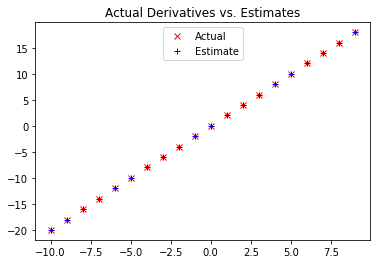

In [14]:
import matplotlib.pyplot as plt

x = range(-10, 10)
plt.title('Actual Derivatives vs. Estimates')
plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
plt.legend(loc=9)

In [15]:
def partial_difference_quotient(f, v, i, h):
    """Compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) # Add h to the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [16]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [17]:
def step(v, direction, step_size):
    """Move step_size in the direction from v"""
    return [v_i + step_size * direction_i 
            for v_i, direction_i in zip(v, direction)]

In [22]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [48]:
import math
def vector_subtract(v, w):
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [32]:
import random
# Pick a random starting point.
v = [random.randint(-10, 10) for i in range(3)]
tolerance = 0.0000001
while True:
    gradient = sum_of_squares_gradient(v) # Compute the gradient at v.
    next_v = step(v, gradient, -0.01) # Take a negative gradient step.
    if distance(next_v, v) < tolerance: # Stop if we are converging.
        break
    v = next_v # Continue if we are not.

In [33]:
v

[1.5964400041392797e-06, 2.39466000620892e-06, 3.991100010348203e-06]

## Choosing the right step size

- using a fixed step size
- gradually shrinking the step size over time
- at each step, choosing the step size that minimizes the value of the objective function

In [34]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.00001]

In [36]:
def safe(f):
    """Return a new function that's the same as f, except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [40]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """Use gradient descent to find theta that minimizes target function."""
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.000001]
    
    theta = theta_0 # Set theta to initial value.
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) 
                       for step_size in step_sizes]
        
        # Choose the one that minimizes the error function.
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        # Stop if we are converging.
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [41]:
def negate(f):
    """Return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

In [42]:
def negate_all(f):
    """The same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

In [43]:
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn), 
                          theta_0,
                          tolerance)

## Stochastic Gradient Descent

In [44]:
def in_random_order(data):
    """Generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] 
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

In [49]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha=0.01):
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0
    
    # If we ever go 100 iterations with no improvements, stop.
    while iterations_with_no_improvements < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # If we found a new minimum, remember it and go back 
            # to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvements = 0
            alpha = alpha_0
        else:
            # Otherwise we are not improving, so try shrinking the step size.
            iterations_with_no_improvements += 1
            alpha *= 0.9
        
        # And take a gradient step for each of the data points.
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

In [2]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn)
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

SyntaxError: invalid syntax (<ipython-input-2-13cc8a07d8e6>, line 3)

# Implementing Stochastic Gradient Descent From Scratch

https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

In [3]:
from collections import namedtuple

data = []
labels = []

with open('./data/wine_quality/winequality-white.csv') as f:
    header = f.readline()
    for col in header.split(';'):  # Split by ";"
        col = col.strip()          # Remove new lines.
        col = col.replace('"', '') # Remove quotations.
        col = col.split(' ')       # Split by whitespace.
        col = '_'.join(col)        # Join by underscore.
        labels.append(col)         # Append to the labels.

    Wine = namedtuple('Wine', labels) # Create a new namedtuple from the labels.
    for line in f.readlines():
        row = line.split(';')
        row = [float(col.strip()) 
               for col in row] # Convert cols to float.
        wine = Wine._make(row)
        data.append(wine)

In [4]:
labels

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
data[0]

Wine(fixed_acidity=7.0, volatile_acidity=0.27, citric_acid=0.36, residual_sugar=20.7, chlorides=0.045, free_sulfur_dioxide=45.0, total_sulfur_dioxide=170.0, density=1.001, pH=3.0, sulphates=0.45, alcohol=8.8, quality=6.0)

In [6]:
len(data[0])

12

In [7]:
len(data)

4898

In [8]:
[key for key in data[0]]

[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0]

In [9]:
def predict(row, coefficients):
    # Make predictions with coefficients.
    y_hat = coefficients[0]
    for i in range(len(row) - 1):
        y_hat += coefficients[i + 1] * row[i]
    return y_hat

In [10]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coef = [0.4, 0.8]

for row in dataset:
    y_hat = predict(row, coef)
    print(f'expected {row[-1]:.3f}, predicted: {y_hat:.3f}')

expected 1.000, predicted: 1.200
expected 3.000, predicted: 2.000
expected 3.000, predicted: 3.600
expected 2.000, predicted: 2.800
expected 5.000, predicted: 4.400


In [11]:
# Estimate linear regression coefficients using stochastic gradient descent.

# https://github.com/google/styleguide/blob/gh-pages/pyguide.md#38-comments-and-docstrings

def stochastic_gradient_descent(train, a, epoch):
    """
    Parameters
    ----------
    train : list str
        The training dataset
    a : int
        The learning rate
    epoch : int
        The number of iterations to train the data
    
    Returns
    -------
    coef : list int
        The coefficient
    """
    coef = [0.0 for i in range(len(train[0]))]
    for i in range(epoch):
        sum_error = 0
        for row in train:
            y_hat = predict(row, coef) # Predict the y_i value.
            error = y_hat - row[-1]    # Error is the difference between predicted and actual value.
            sum_error += error ** 2    # Sum square error.
            coef[0] = coef[0] - a * error
            for j in range(len(row) - 1):
                coef[j + 1] = coef[j + 1] - a * error * row[j]
        print(f'>epoch={i} a={a:.3f} error={sum_error:.3f}')
    return coef

In [12]:
# Calculate coefficients.
a = 0.001
epoch = 50
coef = stochastic_gradient_descent(dataset, a, epoch)
coef

>epoch=0 a=0.001 error=46.236
>epoch=1 a=0.001 error=41.305
>epoch=2 a=0.001 error=36.930
>epoch=3 a=0.001 error=33.047
>epoch=4 a=0.001 error=29.601
>epoch=5 a=0.001 error=26.543
>epoch=6 a=0.001 error=23.830
>epoch=7 a=0.001 error=21.422
>epoch=8 a=0.001 error=19.285
>epoch=9 a=0.001 error=17.389
>epoch=10 a=0.001 error=15.706
>epoch=11 a=0.001 error=14.213
>epoch=12 a=0.001 error=12.888
>epoch=13 a=0.001 error=11.712
>epoch=14 a=0.001 error=10.668
>epoch=15 a=0.001 error=9.742
>epoch=16 a=0.001 error=8.921
>epoch=17 a=0.001 error=8.191
>epoch=18 a=0.001 error=7.544
>epoch=19 a=0.001 error=6.970
>epoch=20 a=0.001 error=6.461
>epoch=21 a=0.001 error=6.009
>epoch=22 a=0.001 error=5.607
>epoch=23 a=0.001 error=5.251
>epoch=24 a=0.001 error=4.935
>epoch=25 a=0.001 error=4.655
>epoch=26 a=0.001 error=4.406
>epoch=27 a=0.001 error=4.186
>epoch=28 a=0.001 error=3.990
>epoch=29 a=0.001 error=3.816
>epoch=30 a=0.001 error=3.662
>epoch=31 a=0.001 error=3.525
>epoch=32 a=0.001 error=3.404
>epoc

[0.22998234937311363, 0.8017220304137576]

In [14]:
# https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
def min_max(data):
    """Find the min and max values for each columns."""
    minmax = []
    cols = len(data[0])
    for i in range(cols):
        values = [row[i] for row in data] # The column values.
        min_val = min(values)
        max_val = max(values)
        minmax.append((min_val, max_val))
    return minmax

In [22]:
def normalize(data, minmax):
    """Rescale columns to the range 0-1."""
    normalized = []
    for row in data:
        cols = []
        for j in range(len(row)):
            num = row[j] - minmax[j][0]
            den = minmax[j][1] - minmax[j][0]
            cols.append(num / den) 
        normalized.append(Wine._make(cols))
    return normalized

In [32]:
import random

random.seed(1)

def cross_validation_split(data, n_folds):
    """Split a dataset into k folds."""
    folds = []
    copy = data.copy() # Make a copy so that the original list is not affected.
    fold_size = len(data) // n_folds
    for i in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = random.randrange(len(copy)) # Select a random row.
            fold.append(copy.pop(index)) # Add to the current fold (bucket).
        folds.append(fold) # Add the fold to the list of folds.
    return folds

In [33]:
import math

def root_mean_squared_error(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return math.sqrt(mean_error)

In [34]:
def evaluate_algorithm(data, algorithm, n_folds, *args):
    """Evaluate an algorithm using a cross validation split."""
    folds = cross_validation_split(data, n_folds)
    scores = []
    for fold in folds:
        train = folds.copy()
        train.remove(fold)
        train = sum(train, [])
        test = []
        for row in fold:
            test.append(row)
        predicted = algorithm(train, test, *args)
        actual = [row[-1] for row in fold]
        rmse = root_mean_squared_error(actual, predicted)
        scores.append(rmse)
    return scores

In [35]:
def linear_regression_sgd(train, test, a, epoch):
    predictions = []
    coef = stochastic_gradient_descent(train, a, epoch)
    for row in test:
        y_hat = predict(row, coef)
        predictions.append(y_hat)
    return predictions

In [36]:
mm = min_max(data)
nn = normalize(data, mm)
n_folds = 5 # Folds.
a = 0.01    # Learning rate.
epoch = 50  # Epoch.

scores = evaluate_algorithm(nn, linear_regression_sgd, n_folds, a, epoch)

>epoch=0 a=0.010 error=79.062
>epoch=1 a=0.010 error=67.512
>epoch=2 a=0.010 error=65.919
>epoch=3 a=0.010 error=65.037
>epoch=4 a=0.010 error=64.511
>epoch=5 a=0.010 error=64.185
>epoch=6 a=0.010 error=63.975
>epoch=7 a=0.010 error=63.836
>epoch=8 a=0.010 error=63.742
>epoch=9 a=0.010 error=63.676
>epoch=10 a=0.010 error=63.628
>epoch=11 a=0.010 error=63.593
>epoch=12 a=0.010 error=63.566
>epoch=13 a=0.010 error=63.544
>epoch=14 a=0.010 error=63.527
>epoch=15 a=0.010 error=63.512
>epoch=16 a=0.010 error=63.500
>epoch=17 a=0.010 error=63.489
>epoch=18 a=0.010 error=63.479
>epoch=19 a=0.010 error=63.469
>epoch=20 a=0.010 error=63.461
>epoch=21 a=0.010 error=63.452
>epoch=22 a=0.010 error=63.444
>epoch=23 a=0.010 error=63.437
>epoch=24 a=0.010 error=63.430
>epoch=25 a=0.010 error=63.423
>epoch=26 a=0.010 error=63.416
>epoch=27 a=0.010 error=63.409
>epoch=28 a=0.010 error=63.402
>epoch=29 a=0.010 error=63.396
>epoch=30 a=0.010 error=63.390
>epoch=31 a=0.010 error=63.383
>epoch=32 a=0.010 

In [41]:
'scores', scores # ('scores', [0.12248058224159092, 0.13034017509167112, 0.12620370547483578, 0.12897687952843237, 0.12446990678682233])

('scores',
 [0.12248058224159092,
  0.13034017509167112,
  0.12620370547483578,
  0.12897687952843237,
  0.12446990678682233])

In [40]:
'mean rmse', f'{sum(scores)/len(scores):.3f}' # ('mean rmse', '0.126')

('mean rmse', '0.126')